## Final Project
**Authors:** Nick Romano and Trevor McCormick   
**Version 1.0**   
**DS160-01: Introduction to Data Science**   


---

This datasets used in this notebook come from the `Dodgers Loop Sensor Data Set` from the UCI Machine Learning Repository. <a href="https://archive.ics.uci.edu/ml/datasets/dodgers+loop+sensor?">Link to Dataset</a>.   

The `Dodgers Loop Sensor Data Set` conatains a three datasets: `Dodgers.data`, `Dodgers.events`, and `Dodgers.names`. The `Dodgers.data` has data pertaining the car count every 5 minutes on the ramp for the 101 North freeway in Los Angeles, which is close to where the Dodgers play. The car count was obtained by using he Freeway Performance Measurement System (PeMS). The `Dodgers.events` has a listing of the Date, Beginning Time, Ending Time, Attendence, Oppenent, and Score of Dodgers Games in 2005. The `Dodgers.names` was just a file that described the `Dodgers.data` and `Dodgers.events` datasets. 

The goal is to be able to predict whether a Dodgers baseball game is undergoing given the flow of traffic.   

---

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.utils import resample

#### Reading in Data

In [2]:
df_traffic = pd.read_csv("Dodgers.data", header = None)
df_games = pd.read_csv("Dodgers.events", header = None)

In [3]:
df_traffic

,0,1
0,4/10/2005 0:00,-1
1,4/10/2005 0:05,-1
2,4/10/2005 0:10,-1
3,4/10/2005 0:15,-1
4,4/10/2005 0:20,-1
...,...,...
50395,10/1/2005 23:35,-1
50396,10/1/2005 23:40,-1
50397,10/1/2005 23:45,-1
50398,10/1/2005 23:50,-1


In [4]:
df_games

,0,1,2,3,4,5
0,04/12/05,13:10:00,16:23:00,55892,San Francisco,W 9-8�
1,04/13/05,19:10:00,21:48:00,46514,San Francisco,W 4-1�
2,04/15/05,19:40:00,21:48:00,51816,San Diego,W 4-0�
3,04/16/05,19:10:00,21:52:00,54704,San Diego,W 8-3�
4,04/17/05,13:10:00,15:31:00,53402,San Diego,W 6-0�
...,...,...,...,...,...,...
76,09/25/05,13:10:00,16:06:00,37846,Pittsburgh,W 9-2�
77,09/26/05,19:10:00,22:27:00,36397,Pittsburgh,W 9-4�
78,09/27/05,19:10:00,21:33:00,42604,Arizona,L 2-0�
79,09/28/05,19:10:00,21:58:00,46424,Arizona,L 4-3�


In [5]:
df_traffic.to_csv("Original_Dodgers_Traffic.csv", index=False, header=False)

In [6]:
df_games.to_csv("Original_Dodgers_Events.csv", index=False, header=False)

We ended up saving an original version of the Dodgers.data and Dodgers.events data frames as .csv files to have a version in that format

---
#### Processesing and Cleaning up the data



   
**df_games cleanup**

In [7]:
df_games

,0,1,2,3,4,5
0,04/12/05,13:10:00,16:23:00,55892,San Francisco,W 9-8�
1,04/13/05,19:10:00,21:48:00,46514,San Francisco,W 4-1�
2,04/15/05,19:40:00,21:48:00,51816,San Diego,W 4-0�
3,04/16/05,19:10:00,21:52:00,54704,San Diego,W 8-3�
4,04/17/05,13:10:00,15:31:00,53402,San Diego,W 6-0�
...,...,...,...,...,...,...
76,09/25/05,13:10:00,16:06:00,37846,Pittsburgh,W 9-2�
77,09/26/05,19:10:00,22:27:00,36397,Pittsburgh,W 9-4�
78,09/27/05,19:10:00,21:33:00,42604,Arizona,L 2-0�
79,09/28/05,19:10:00,21:58:00,46424,Arizona,L 4-3�


Renaming the columns of df_games with appropriately labeled column names rather than leaving the the numbered column headings

In [8]:
df_games = df_games.rename(columns = {0: 'Date', 
                                      1: 'Starttime',
                                      2: 'Endtime',
                                      3: 'Total Attendance',
                                      4: 'Opponent',
                                      5: 'Result'})

df_games

,Date,Starttime,Endtime,Total Attendance,Opponent,Result
0,04/12/05,13:10:00,16:23:00,55892,San Francisco,W 9-8�
1,04/13/05,19:10:00,21:48:00,46514,San Francisco,W 4-1�
2,04/15/05,19:40:00,21:48:00,51816,San Diego,W 4-0�
3,04/16/05,19:10:00,21:52:00,54704,San Diego,W 8-3�
4,04/17/05,13:10:00,15:31:00,53402,San Diego,W 6-0�
...,...,...,...,...,...,...
76,09/25/05,13:10:00,16:06:00,37846,Pittsburgh,W 9-2�
77,09/26/05,19:10:00,22:27:00,36397,Pittsburgh,W 9-4�
78,09/27/05,19:10:00,21:33:00,42604,Arizona,L 2-0�
79,09/28/05,19:10:00,21:58:00,46424,Arizona,L 4-3�


With the Date, Starttime, and Endtime taking up three columns we wanted to combine these columns in a way that would have just the Starttime and Endtime of each Dodgers game in Datetime form.   

In doing so, we had to check whether or not there was a baseball game that extended into the next day. There doesn't seem to be a game that lasted into the next day as the latest Endtime value was 23:18:00 or 11:18:00 pm. Knowing this, we wouldn't have to change any of the values within the Date column to match the Endtime values.    

To combine the Date and Endtime columns, we converted these columns into strings and concatenated them with a space in between, then we converted the resulting value into Datetime form and stored the value within the Endtime column. We did this same strategy to with the Date and Startime columns and stored the resulting datetime value within the Date column. Then we dropped the Starttime column, since the needed data was now within the Date column, then renamed the Date column as Starttime 

In [9]:
print(max(df_games['Endtime']))

23:18:00


In [10]:
df_games.Endtime = df_games.Date.astype(str) + " " + df_games.Endtime.astype(str)
df_games.Endtime = pd.to_datetime(df_games.Endtime)

df_games.Date = df_games.Date.astype(str) + " " + df_games.Starttime.astype(str)
df_games.Date = pd.to_datetime(df_games.Date)

df_games.drop(columns=['Starttime', 'Result'], axis = 1, inplace=True)
df_games.rename(columns = {'Date': 'Starttime'}, inplace=True)

In [11]:
df_games

,Starttime,Endtime,Total Attendance,Opponent
0,2005-04-12 13:10:00,2005-04-12 16:23:00,55892,San Francisco
1,2005-04-13 19:10:00,2005-04-13 21:48:00,46514,San Francisco
2,2005-04-15 19:40:00,2005-04-15 21:48:00,51816,San Diego
3,2005-04-16 19:10:00,2005-04-16 21:52:00,54704,San Diego
4,2005-04-17 13:10:00,2005-04-17 15:31:00,53402,San Diego
...,...,...,...,...
76,2005-09-25 13:10:00,2005-09-25 16:06:00,37846,Pittsburgh
77,2005-09-26 19:10:00,2005-09-26 22:27:00,36397,Pittsburgh
78,2005-09-27 19:10:00,2005-09-27 21:33:00,42604,Arizona
79,2005-09-28 19:10:00,2005-09-28 21:58:00,46424,Arizona


In [12]:
df_games.to_csv("New_Dodgers_Events.csv", index=False)

**df_traffic clean up**

In [13]:
df_traffic

,0,1
0,4/10/2005 0:00,-1
1,4/10/2005 0:05,-1
2,4/10/2005 0:10,-1
3,4/10/2005 0:15,-1
4,4/10/2005 0:20,-1
...,...,...
50395,10/1/2005 23:35,-1
50396,10/1/2005 23:40,-1
50397,10/1/2005 23:45,-1
50398,10/1/2005 23:50,-1


Renaming column headers that appropriately fit the data

In [14]:
df_traffic = df_traffic.rename(columns = {0: 'Date', 
                                          1: 'Traffic_flow'})

The data within the Date column is represented as object rather than being in Datetime form

In [15]:
df_traffic.dtypes

Date            object
Traffic_flow     int64
dtype: object

In [16]:
df_traffic.Date = pd.to_datetime(df_traffic.Date)
df_traffic.dtypes

Date            datetime64[ns]
Traffic_flow             int64
dtype: object

Checking to see if datatype change happened correctly

In [17]:
df_traffic

,Date,Traffic_flow
0,2005-04-10 00:00:00,-1
1,2005-04-10 00:05:00,-1
2,2005-04-10 00:10:00,-1
3,2005-04-10 00:15:00,-1
4,2005-04-10 00:20:00,-1
...,...,...
50395,2005-10-01 23:35:00,-1
50396,2005-10-01 23:40:00,-1
50397,2005-10-01 23:45:00,-1
50398,2005-10-01 23:50:00,-1


Since we are trying to predict whether or not a Dodgers baseball game is taking place given the traffic car count, we wanted to add a column to the df_traffic dataframe that has a 1 when there is a game happening and 0 otherwise. However, since traffic builds up prior to the starting time of a game and after the starting time of a game we decided to include 30 minutes before the startime, throughout the game, and 30 minutes after the game as indicating that there is game underway. 

The occurance list, takes the index values of all the index values within the df_traffic dataframe that are within 30 minutes before, during, and 30 minutes after each dodgers game. Then we add a "Game_Occurance" column to the dataframe with an initial value of 0 and add 1 to any index that is in the occurance list.  

Looking ahead, we thought that we might want to take into account the weekday, hour, and minute in building our models so we pulled the these datapoints from the Date column and stored each of them into their own column.

Note: We previously tried to run the following code to for matching the df_traffic.Date and df_games.Starttime and df_games.Endtime data.   
**for i in occurance_list:   
    for j in df_traffic.index.values:   
        if j == i:   
            df_traffic.Game_Occurance[i] += 1**

However, we got a SettingWithCopyingWarning. To get around this, we used .iat[i] to get access to the data at a specific index value since we were looping through the index values

In [18]:
df_traffic.insert(1, "Week_Day", 0)
df_traffic.insert(2, "Hour", 0)
df_traffic.insert(3, "Minute", 0)
df_traffic.insert(5, "Game_Occurance", 0)

In [19]:
occurance_list = []
for i in range(0, 80):
    a = df_traffic[(df_traffic.Date >= (df_games.Starttime[i] - pd.Timedelta(minutes = 30))) & 
                   (df_traffic.Date <= (df_games.Endtime[i] + pd.Timedelta(minutes = 30)))].index.values.tolist()
    for j in a:
        occurance_list.append(j)

for i in occurance_list:
    for j in df_traffic.index.values:
        if j == i:
            df_traffic.Game_Occurance.iat[i] += 1

In [20]:
for i in df_traffic.index.values:
    df_traffic.Week_Day.iat[i] = df_traffic.Date.iat[i].weekday()
    df_traffic.Hour.iat[i] = df_traffic.Date.iat[i].hour
    df_traffic.Minute.iat[i] = df_traffic.Date.iat[i].minute

Using a Query to check the output previous few cells

In [21]:
df_traffic.query("Game_Occurance == 1")

,Date,Week_Day,Hour,Minute,Traffic_flow,Game_Occurance
728,2005-04-12 12:40:00,1,12,40,40,1
729,2005-04-12 12:45:00,1,12,45,13,1
730,2005-04-12 12:50:00,1,12,50,34,1
731,2005-04-12 12:55:00,1,12,55,30,1
732,2005-04-12 13:00:00,1,13,0,34,1
...,...,...,...,...,...,...
49513,2005-09-28 22:05:00,2,22,5,14,1
49514,2005-09-28 22:10:00,2,22,10,40,1
49515,2005-09-28 22:15:00,2,22,15,26,1
49516,2005-09-28 22:20:00,2,22,20,31,1


**Dropping missing values**

The missing values that are within the Traffic_flow column are indicated with a value of -1.   
   
By using a query to look up the number of times that the Traffic_flow is equal to -1, there are 2903 instances of -1. This means that there are a total of **2903** of missing values within the df_traffic dataframe, **122** of which occur during Dodgers games. The total 2903 missing values within the df_traffic dataframe represents roughly **5.76%** of the total data points. The 122 missing data points that occur during a Dodgers games represents just a shade over **3.2778%** of the data points that occur during a Dodgers game. 

In [22]:
print(f"Total number of missing values: {df_traffic.query('Traffic_flow == -1').Traffic_flow.count()}")
print(f"Proportion of the total number of missing values: {(df_traffic.query('Traffic_flow == -1').Traffic_flow.count() / df_traffic.Traffic_flow.count()) * 100}%")

Total number of missing values: 2903
Proportion of the total number of missing values: 5.759920634920635%


In [23]:
print(f"Total number of missing values that occur during a Dodgers game: {df_traffic.query('Traffic_flow == -1 and Game_Occurance == 1').Traffic_flow.count()}")
print(f"Proportion of the total of missing values that occur during a Dodgers game: {(df_traffic.query('Traffic_flow == -1 and Game_Occurance == 1').Traffic_flow.count() / df_traffic.query('Game_Occurance == 1').Traffic_flow.count()) * 100}%")


Total number of missing values that occur during a Dodgers game: 122
Proportion of the total of missing values that occur during a Dodgers game: 3.277807630306287%


   
Futhermore, it doesn't appear that we are missing to much data from the games since we are only missing traffic data that only happen during a total of 3 games

In [24]:
df_traffic.query('Traffic_flow == -1 and Game_Occurance == 1').Date.dt.date.groupby(
    df_traffic.query('Traffic_flow == -1 and Game_Occurance == 1').Date.dt.date).count()

Date
2005-06-27    43
2005-06-28    50
2005-09-10    29
Name: Date, dtype: int64

In [25]:
df_traffic = df_traffic[df_traffic.Traffic_flow != -1]
df_traffic.reset_index(drop = True, inplace=True)
df_traffic

,Date,Week_Day,Hour,Minute,Traffic_flow,Game_Occurance
0,2005-04-11 07:35:00,0,7,35,23,0
1,2005-04-11 07:40:00,0,7,40,42,0
2,2005-04-11 07:45:00,0,7,45,37,0
3,2005-04-11 07:50:00,0,7,50,24,0
4,2005-04-11 07:55:00,0,7,55,39,0
...,...,...,...,...,...,...
47492,2005-09-30 23:45:00,4,23,45,14,0
47493,2005-09-30 23:50:00,4,23,50,12,0
47494,2005-09-30 23:55:00,4,23,55,8,0
47495,2005-10-01 00:00:00,5,0,0,13,0


In [26]:
df_traffic.to_csv("New_Dodgers_Traffic.csv", index=False)

### Description of Cleaned Traffic Dataset

**Basic Summary of Dataset**

In [27]:
df_traffic.shape

(47497, 6)

In [28]:
df_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47497 entries, 0 to 47496
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            47497 non-null  datetime64[ns]
 1   Week_Day        47497 non-null  int64         
 2   Hour            47497 non-null  int64         
 3   Minute          47497 non-null  int64         
 4   Traffic_flow    47497 non-null  int64         
 5   Game_Occurance  47497 non-null  int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 2.2 MB


**Unusual Inbalance between datapoints that occur during non-game intervals and game intervals**

In [29]:
Values = pd.DataFrame({"Value Count": df_traffic.Game_Occurance.value_counts()})
Proportions = df_traffic.Game_Occurance.value_counts(normalize=True).rename("Proportion")
Values.join(Proportions)
Values.rename(index = {0: "No Game Occuring",
                       1: "Game Occuring"}, inplace = True)

Values

,Value Count
No Game Occuring,43897
Game Occuring,3600


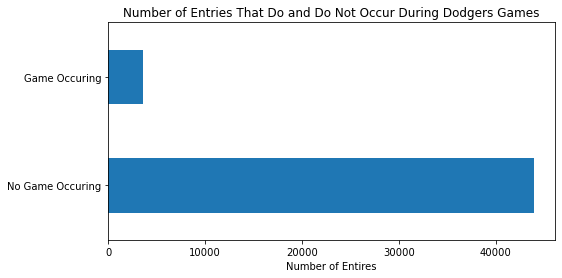

In [30]:
figure = plt.figure(figsize = (8,4))
Values["Value Count"].plot(kind="barh")
plt.title("Number of Entries That Do and Do Not Occur During Dodgers Games")
plt.xlabel("Number of Entires")
plt.savefig('Inbalanced_barchart.png', bbox_inches='tight')

### Creating a balanced dataset

Due to this drastic difference in the number of entries that occur when the Dodgers aren't playing and when the Dodgers are playing, we resampled the Traffic dataset to include a total of 3500 data points from when the Dodgers are playing and when they are not playing. 

In [31]:
Game_Occuring = df_traffic.query("Game_Occurance == 1")
No_Game_Occuring = df_traffic.query("Game_Occurance == 0")
Game_Occuring_resampled = resample(Game_Occuring, n_samples = 3500)
No_Game_Occuring_resampled = resample(No_Game_Occuring, n_samples = 3500)
balanced_traffic = pd.concat([Game_Occuring_resampled, No_Game_Occuring_resampled], axis = 0)
balanced_traffic.reset_index(drop = True, inplace=True)
balanced_traffic

balanced_traffic.to_csv("Balanced_New_Dodgers_Traffic.csv", index=False)

### Dataset Descriprion of Balanced Dataset

**Basic Summary of Dataset**

In [32]:
balanced_traffic.shape

(7000, 6)

In [33]:
balanced_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            7000 non-null   datetime64[ns]
 1   Week_Day        7000 non-null   int64         
 2   Hour            7000 non-null   int64         
 3   Minute          7000 non-null   int64         
 4   Traffic_flow    7000 non-null   int64         
 5   Game_Occurance  7000 non-null   int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 328.2 KB


**Interesting Statistics**

Comparing the distributions of the car counts of the balanced dataset, the car count or traffic distribution during Dodgers games sees a higher frequency of higher car counts compared to when there is no Dodgers game taking place

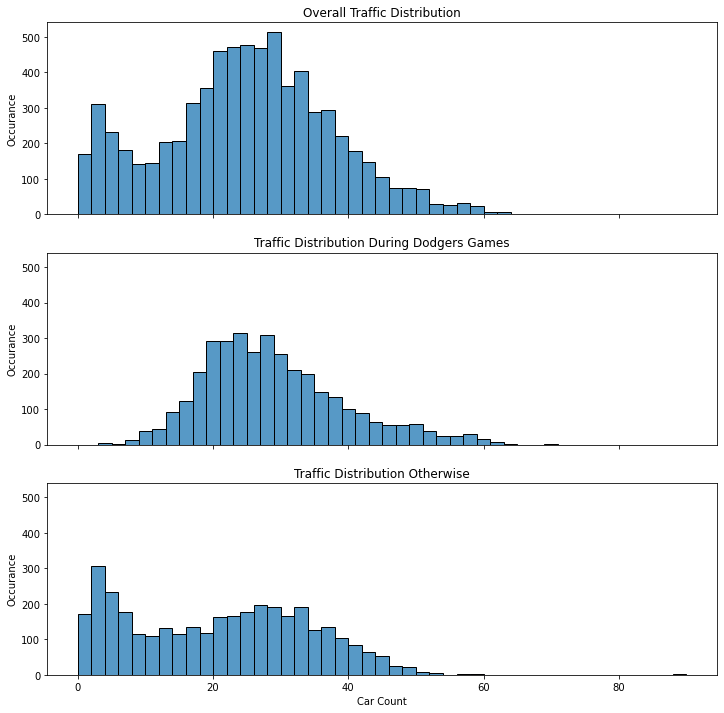

In [34]:
figure1, axes = plt.subplots(3,1, figsize=(12,12), sharex=True, sharey= True)
sns.histplot(data=balanced_traffic, x="Traffic_flow", binwidth = 2, ax=axes[0]).set(title = "Overall Traffic Distribution", 
                                                                      xlabel = "Car Count",
                                                                      ylabel = "Occurance")

sns.histplot(data=balanced_traffic.query("Game_Occurance == 1"), x="Traffic_flow", binwidth = 2, ax=axes[1]).set(
    title = "Traffic Distribution During Dodgers Games", 
    xlabel = "Car Count",
    ylabel = "Occurance")

sns.histplot(data=balanced_traffic.query("Game_Occurance == 0"), x="Traffic_flow", binwidth = 2, ax=axes[2]).set(
    title = "Traffic Distribution Otherwise", 
    xlabel = "Car Count",
    ylabel = "Occurance")

plt.savefig('Traffic_Count_Distributions.png', bbox_inches='tight')

Wanting to see how Dodgers games affects the total car by time, we created a bar chart containing the number of 5-minute intervals in which a Dodgers game takes palce and a heatmap heatmap for the total car count by minute (x-axis) and hour (y-axis). In doing so we see that the total car count spikes during the time of Dodgers games, especially during the later games that occur after 7pm (19 hr).

In [35]:
#Heat map preperations
traffic_table = pd.DataFrame(balanced_traffic.Traffic_flow.groupby([balanced_traffic.Date.dt.hour,balanced_traffic.Date.dt.minute]).sum())
traffic_table.rename_axis(["hour", "minute"], inplace=True)
traffic_table = traffic_table.reset_index()
traffic_table = traffic_table.pivot("hour", "minute", "Traffic_flow")

In [36]:
Gametime_hours = balanced_traffic.query("Game_Occurance == 1").Hour.groupby(balanced_traffic.query("Game_Occurance == 1").Hour).count()

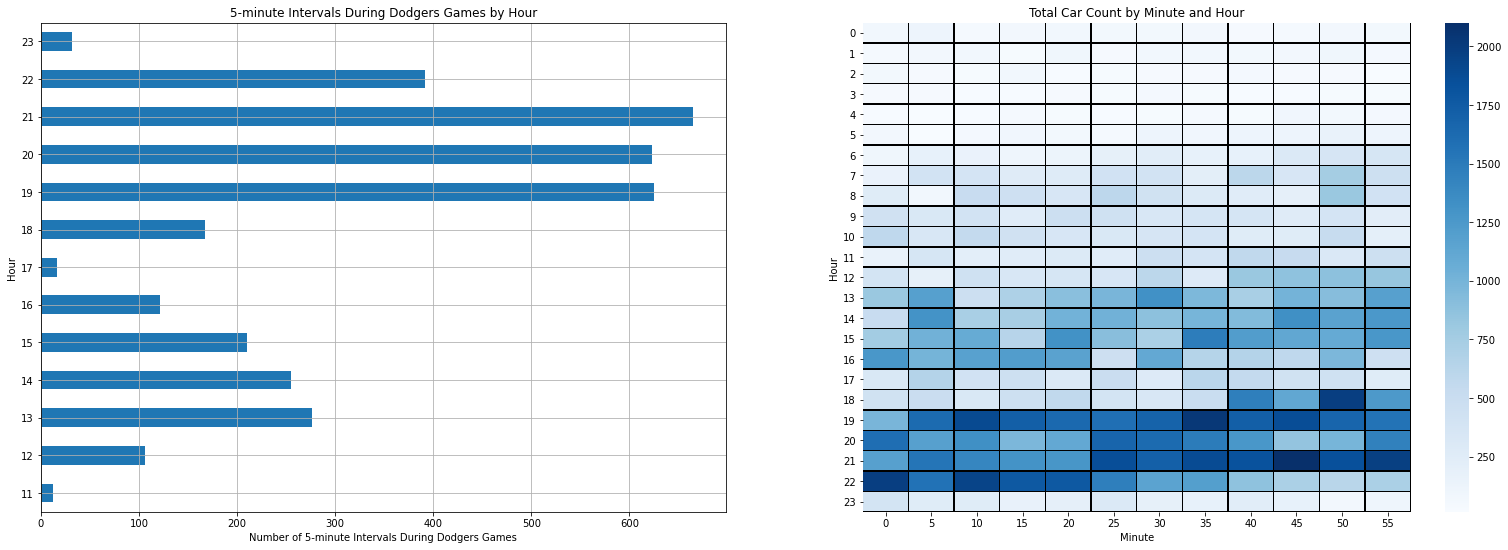

In [37]:
figure2 = plt.figure(figsize=(27,9))

ax1 = figure2.add_subplot(121)
Gametime_hours.plot(kind="barh", grid=True)
plt.title("5-minute Intervals During Dodgers Games by Hour")
plt.ylabel("Hour")
plt.xlabel("Number of 5-minute Intervals During Dodgers Games")

ax2 = figure2.add_subplot(122)
sns.heatmap(traffic_table, cmap='Blues', linewidths=.5, linecolor='black')
plt.title("Total Car Count by Minute and Hour")
plt.ylabel("Hour")
plt.xlabel("Minute")
plt.yticks(rotation=0)

plt.savefig('Game_Occurance_Intervals_and_Total_Traffic_Count.png', bbox_inches='tight')